In [1]:
import warnings
warnings.filterwarnings('ignore')
from fpgrowth_py import fpgrowth

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gr

In [2]:
df = pd.read_csv("main.csv")
df

,Unnamed: 0,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1,0.500000,0.000000,0.000000,0.000000,1
1,1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0,0.000000,615.714286,341.070789,4.486071,2
2,2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0,0.000000,359.310000,203.875689,-100.884000,0
3,3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0,0.000000,1457.550000,0.000000,0.000000,1
4,4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0,0.000000,294.400000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,4062,18280.0,277,1,45,180.60,180.600000,10,0.000000,0,9,1,0,0.000000,180.600000,0.000000,0.000000,1
4063,4063,18281.0,180,1,54,80.82,80.820000,7,0.000000,6,10,1,0,0.000000,80.820000,0.000000,0.000000,0
4064,4064,18282.0,7,3,98,176.60,58.866667,12,9.916667,4,13,1,1,0.142857,88.300000,14.792674,-20.920000,0
4065,4065,18283.0,3,16,1355,2039.58,127.473750,262,0.465181,3,14,1,0,0.000000,203.958000,165.798738,22.319273,2


In [3]:
x1 = df[["CustomerID","cluster","Days_Since_Last_Purchase","Average_Days_Between_Purchases","Average_Transaction_Value"]]
x1

,CustomerID,cluster,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Average_Transaction_Value
0,12346.0,1,325,0.000000,0.000000
1,12347.0,2,2,2.016575,615.714286
2,12348.0,0,75,10.884615,359.310000
3,12349.0,1,18,0.000000,1457.550000
4,12350.0,1,310,0.000000,294.400000
...,...,...,...,...,...
4062,18280.0,1,277,0.000000,180.600000
4063,18281.0,0,180,0.000000,80.820000
4064,18282.0,0,7,9.916667,58.866667
4065,18283.0,2,3,0.465181,127.473750


In [4]:
x1['R_score'] = pd.qcut(x1['Days_Since_Last_Purchase'], q=3, labels=[1, 2, 3])  # High recency will have a score of 1
x1['F_score'] = pd.qcut(x1['Average_Days_Between_Purchases'], q=3, labels=[1, 2, 3]) 
x1['M_score'] = pd.qcut(x1['Average_Transaction_Value'], q=3, labels=[1, 2, 3]) 
x1

,CustomerID,cluster,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Average_Transaction_Value,R_score,F_score,M_score
0,12346.0,1,325,0.000000,0.000000,3,1,1
1,12347.0,2,2,2.016575,615.714286,1,2,3
2,12348.0,0,75,10.884615,359.310000,2,3,3
3,12349.0,1,18,0.000000,1457.550000,1,1,3
4,12350.0,1,310,0.000000,294.400000,3,1,2
...,...,...,...,...,...,...,...,...
4062,18280.0,1,277,0.000000,180.600000,3,1,2
4063,18281.0,0,180,0.000000,80.820000,3,1,1
4064,18282.0,0,7,9.916667,58.866667,1,3,1
4065,18283.0,2,3,0.465181,127.473750,1,2,1


In [5]:
x1['RFM'] = x1[['R_score', 'F_score', 'M_score']].astype(str).agg(''.join, axis=1)
x1

,CustomerID,cluster,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Average_Transaction_Value,R_score,F_score,M_score,RFM
0,12346.0,1,325,0.000000,0.000000,3,1,1,311
1,12347.0,2,2,2.016575,615.714286,1,2,3,123
2,12348.0,0,75,10.884615,359.310000,2,3,3,233
3,12349.0,1,18,0.000000,1457.550000,1,1,3,113
4,12350.0,1,310,0.000000,294.400000,3,1,2,312
...,...,...,...,...,...,...,...,...,...
4062,18280.0,1,277,0.000000,180.600000,3,1,2,312
4063,18281.0,0,180,0.000000,80.820000,3,1,1,311
4064,18282.0,0,7,9.916667,58.866667,1,3,1,131
4065,18283.0,2,3,0.465181,127.473750,1,2,1,121


In [6]:
def assign_cluster(score):
    high_value_scores = ['111', '112', '113', '121', '122', '123']
    nurture_scores = ['133', '213', '222', '223', '232', '233']
    risk_scores = ['131', '132', '231', '311', '312', '313', '321', '322', '323', '331', '332', '333']

    if score in high_value_scores:
        return 'High Value'
    elif score in nurture_scores:
        return 'Nurture'
    elif score in risk_scores:
        return 'Risk'
    else:
        return 'Other'

In [7]:
x1['Segment'] = x1['RFM'].apply(assign_cluster)
x1

,CustomerID,cluster,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Average_Transaction_Value,R_score,F_score,M_score,RFM,Segment
0,12346.0,1,325,0.000000,0.000000,3,1,1,311,Risk
1,12347.0,2,2,2.016575,615.714286,1,2,3,123,High Value
2,12348.0,0,75,10.884615,359.310000,2,3,3,233,Nurture
3,12349.0,1,18,0.000000,1457.550000,1,1,3,113,High Value
4,12350.0,1,310,0.000000,294.400000,3,1,2,312,Risk
...,...,...,...,...,...,...,...,...,...,...
4062,18280.0,1,277,0.000000,180.600000,3,1,2,312,Risk
4063,18281.0,0,180,0.000000,80.820000,3,1,1,311,Risk
4064,18282.0,0,7,9.916667,58.866667,1,3,1,131,Risk
4065,18283.0,2,3,0.465181,127.473750,1,2,1,121,High Value


In [8]:
xci = x1[["CustomerID","Segment"]]

xci

,CustomerID,Segment
0,12346.0,Risk
1,12347.0,High Value
2,12348.0,Nurture
3,12349.0,High Value
4,12350.0,Risk
...,...,...
4062,18280.0,Risk
4063,18281.0,Risk
4064,18282.0,Risk
4065,18283.0,High Value


In [9]:
xci["Segment"].value_counts()

Risk          1977
Nurture        955
High Value     823
Other          312
Name: Segment, dtype: int64

In [10]:
def map_rfm_labels(rfm_score):
    """Maps RFM scores to descriptive labels.

    Args:
        rfm_score: A string representing the RFM score (e.g., '111').

    Returns:
        The corresponding descriptive label (e.g., 'Champions').
    """

    label_map = {
        '111': 'Champions',
        '112': 'Loyalists',
        '113': 'High Potential',
        '121': 'Big Spender',
        '122': 'Regular Spenders',
        '123': 'Emerging Loyalists',
        '133': 'Needs a Spark',
        '213': 'Upscale Focus',
        '222': 'Consistent Spender',
        '223': 'Potential Upscale',
        '232': 'Win-Back Target',
        '233': 'Casual Shopper',
        '131': 'Wake-Up Call',
        '132': 'Slipping Away',
        '231': 'Dormant Upscale',
        '311': 'One-offs', 
        '312': 'One-offs', 
        '313': 'One-offs',
        '321': 'Sporadic',
        '322': 'Sporadic',
        '323': 'Sporadic',
        '331': 'Lost Cause',
        '332': 'Lost Cause',
        '333': 'Lost Cause'
    }

    return label_map.get(rfm_score, 'Uncategorized')

In [11]:
x1['Subsegment'] = x1['RFM'].apply(map_rfm_labels)
x1

,CustomerID,cluster,Days_Since_Last_Purchase,Average_Days_Between_Purchases,Average_Transaction_Value,R_score,F_score,M_score,RFM,Segment,Subsegment
0,12346.0,1,325,0.000000,0.000000,3,1,1,311,Risk,One-offs
1,12347.0,2,2,2.016575,615.714286,1,2,3,123,High Value,Emerging Loyalists
2,12348.0,0,75,10.884615,359.310000,2,3,3,233,Nurture,Casual Shopper
3,12349.0,1,18,0.000000,1457.550000,1,1,3,113,High Value,High Potential
4,12350.0,1,310,0.000000,294.400000,3,1,2,312,Risk,One-offs
...,...,...,...,...,...,...,...,...,...,...,...
4062,18280.0,1,277,0.000000,180.600000,3,1,2,312,Risk,One-offs
4063,18281.0,0,180,0.000000,80.820000,3,1,1,311,Risk,One-offs
4064,18282.0,0,7,9.916667,58.866667,1,3,1,131,Risk,Wake-Up Call
4065,18283.0,2,3,0.465181,127.473750,1,2,1,121,High Value,Big Spender


In [12]:
x1.columns

Index(['CustomerID', 'cluster', 'Days_Since_Last_Purchase',
       'Average_Days_Between_Purchases', 'Average_Transaction_Value',
       'R_score', 'F_score', 'M_score', 'RFM', 'Segment', 'Subsegment'],
      dtype='object')

In [18]:
cdata = pd.read_csv("express.csv")
cdata



,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,OnCredit,GroupPrice
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30,False,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,False,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00,False,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,False,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34,False,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
536424,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France,10.20,False,10.20
536425,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France,12.60,False,12.60
536426,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France,16.60,False,16.60
536427,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France,16.60,False,16.60


In [19]:
cdata =cdata[["CustomerID","InvoiceNo","StockCode"]]
cdata

 

,CustomerID,InvoiceNo,StockCode
0,17850,536365,85123A
1,17850,536365,71053
2,17850,536365,84406B
3,17850,536365,84029G
4,17850,536365,84029E
...,...,...,...
536424,12680,581587,22613
536425,12680,581587,22899
536426,12680,581587,23254
536427,12680,581587,23255


In [20]:
basket = cdata.groupby(["InvoiceNo","CustomerID"]).agg({
    "StockCode": lambda s : list(set(s))
})

basket

,,StockCode
InvoiceNo,CustomerID,
536365,17850,"[84406B, 84029E, 85123A, 21730, 22752, 84029G,..."
536366,17850,"[22633, 22632]"
536367,13047,"[22745, 84969, 22749, 21755, 22748, 22310, 226..."
536368,13047,"[22913, 22912, 22914, 22960]"
536369,13047,[21756]
...,...,...
C581470,17924,[23084]
C581484,16446,[23843]
C581490,14397,"[23144, 22178]"


In [17]:
unique = cdata.drop_duplicates(subset="CustomerID")
unique

,CustomerID,InvoiceNo,StockCode
0,17850,536365,85123A
9,13047,536367,84879
26,12583,536370,22728
46,13748,536371,22086
65,15100,536374,21258
...,...,...,...
534457,13436,581233,22178
534742,15520,581241,22922
535551,13298,581385,84029G
536296,14569,581416,22466


In [23]:
xci["CustomerID"] = xci["CustomerID"].astype(object)
xci.dtypes

CustomerID    object
Segment       object
dtype: object

In [28]:
trial = pd.merge(cdata,xci,on="CustomerID",how="left")
trial

,CustomerID,InvoiceNo,StockCode,Segment
0,17850,536365,85123A,NaN
1,17850,536365,71053,NaN
2,17850,536365,84406B,NaN
3,17850,536365,84029G,NaN
4,17850,536365,84029E,NaN
...,...,...,...,...
536424,12680,581587,22613,NaN
536425,12680,581587,22899,NaN
536426,12680,581587,23254,NaN
536427,12680,581587,23255,NaN


In [30]:
trial.sample(5)

,CustomerID,InvoiceNo,StockCode,Segment
318123,15910,565209,20754,NaN
347579,Unknown,567667,46776C,NaN
453418,12518,575787,22636,NaN
332377,15358,566314,23374,NaN
490583,17530,578324,23218,NaN


In [32]:
n1 = cdata.loc[cdata["CustomerID"]!="Unknown"]
n1

,CustomerID,InvoiceNo,StockCode
0,17850,536365,85123A
1,17850,536365,71053
2,17850,536365,84406B
3,17850,536365,84029G
4,17850,536365,84029E
...,...,...,...
536424,12680,581587,22613
536425,12680,581587,22899
536426,12680,581587,23254
536427,12680,581587,23255


In [33]:

trial = pd.merge(n1, xci, on="CustomerID", how="left")

In [34]:
trial

,CustomerID,InvoiceNo,StockCode,Segment
0,17850,536365,85123A,NaN
1,17850,536365,71053,NaN
2,17850,536365,84406B,NaN
3,17850,536365,84029G,NaN
4,17850,536365,84029E,NaN
...,...,...,...,...
404871,12680,581587,22613,NaN
404872,12680,581587,22899,NaN
404873,12680,581587,23254,NaN
404874,12680,581587,23255,NaN


In [44]:
n1['CustomerID'] = n1['CustomerID'].astype(str)
xci['CustomerID'] = xci['CustomerID'].astype(str)

In [45]:
merged_df = pd.merge(n1, xci, on='CustomerID', how='left')
merged_df

,CustomerID,InvoiceNo,StockCode,Segment
0,17850,536365,85123A,NaN
1,17850,536365,71053,NaN
2,17850,536365,84406B,NaN
3,17850,536365,84029G,NaN
4,17850,536365,84029E,NaN
...,...,...,...,...
404871,12680,581587,22613,Risk
404872,12680,581587,22899,Risk
404873,12680,581587,23254,Risk
404874,12680,581587,23255,Risk


In [47]:
merged_df.dropna(inplace=True)
merged_df

,CustomerID,InvoiceNo,StockCode,Segment
9,13047,536367,84879,Nurture
10,13047,536367,22745,Nurture
11,13047,536367,22748,Nurture
12,13047,536367,22749,Nurture
13,13047,536367,22310,Nurture
...,...,...,...,...
404871,12680,581587,22613,Risk
404872,12680,581587,22899,Risk
404873,12680,581587,23254,Risk
404874,12680,581587,23255,Risk


In [48]:
merged_df.Segment.value_counts()

High Value    128999
Nurture        81948
Risk           77618
Other          12192
Name: Segment, dtype: int64

In [53]:
high_value_df = merged_df[merged_df['Segment'] == 'High Value']
risk_df = merged_df[merged_df['Segment'] == 'Risk']
nurture_df = merged_df[merged_df['Segment'] == 'Nurture']
other_df = merged_df[merged_df['Segment'].isin(['High Value', 'Risk', 'Nurture']) == False]

high_value_df

,CustomerID,InvoiceNo,StockCode,Segment
26,12583,536370,22728,High Value
27,12583,536370,22727,High Value
28,12583,536370,22726,High Value
29,12583,536370,21724,High Value
30,12583,536370,21883,High Value
...,...,...,...,...
404852,15804,581585,21684,High Value
404853,15804,581585,22398,High Value
404854,15804,581585,23328,High Value
404855,15804,581585,23145,High Value


In [153]:
# Aggregate Transctions
def aggregate_transactions(df):
     transactions = df.groupby(["InvoiceNo","CustomerID"]).agg({"StockCode": lambda s : list(set(s))})
     return transactions

In [154]:
def get_rules(df):
    hbasket = aggregate_transactions(df)
    freqItemSet, rules = fpgrowth(hbasket['StockCode'].values, minSupRatio=0.01, minConf=0.8)
    print('Number of rules generated : ', len(rules))
    association=pd.DataFrame(rules,columns =['basket','next_product','proba']) 
    association=association.sort_values(by='proba',ascending=False)
    
    return association
    

In [79]:
lb = get_rules(other_df)
lb

time to execute in seconds :  1.6149539947509766  s.
Number of rules generated :  240


,basket,next_product,proba
0,{22784},{85123A},1.000000
117,"{22771, 21672}",{21668},1.000000
151,"{22384, 20726}","{22382, 20728}",1.000000
149,"{22384, 20726}",{20728},1.000000
147,"{22384, 20725, 20726}",{22382},1.000000
...,...,...,...
89,{21670},"{21668, 21669}",0.818182
54,{82581},{82580},0.818182
53,{22398},{22400},0.818182
138,"{22771, 21668}",{22775},0.818182


In [155]:
#Get frequent item sets
def get_most_frequent_itemsets(df):
    # Group by InvoiceNo and CustomerID and aggregate unique StockCodes into lists
    hbasket = aggregate_transactions(df)
    
    # Run FP-Growth algorithm to find frequent itemsets
    freqItemSet, _ = fpgrowth(hbasket['StockCode'].values, minSupRatio=0.01, minConf=0.7)
    
    # Sort items within each itemset and convert frequent itemsets to DataFrame
    frequent_itemsets_df = pd.DataFrame({'Frequent Itemset': [sorted(itemset) for itemset in freqItemSet]})
    
    # Remove duplicates (after sorting, duplicate itemsets will be identical)
    frequent_itemsets_df = frequent_itemsets_df.drop_duplicates(subset='Frequent Itemset')
    
    # Filter out itemsets with less than 2 items
    frequent_itemsets_df = frequent_itemsets_df[frequent_itemsets_df['Frequent Itemset'].apply(len) > 2]
    
    return frequent_itemsets_df


In [98]:
xg = get_most_frequent_itemsets(nurture_df)
xg

,Frequent Itemset
107,"[23170, 23171, 23172]"
320,"[22749, 22750, 22751]"
334,"[23173, 23174, 23175]"
368,"[22725, 22726, 22727]"
523,"[22727, 22729, 22730]"
...,...
1114,"[22383, 23203, 23209]"
1117,"[20725, 22383, 85099B]"
1119,"[20725, 22383, 23209]"
1127,"[23203, 23209, 85099B]"


In [157]:
xg["Frequent Itemset"][107]

['23170', '23171', '23172']

## Promotional Strategies

In [149]:
#Get Buy One,Get One Discounted Bundles
def get_bogd_bundles(df):
        hbasket = aggregate_transactions(df)
        freqItemSet, rules = fpgrowth(hbasket['StockCode'].values, minSupRatio=0.01, minConf=0.9)
        print('Number of rules generated : ', len(rules))
        
        association=pd.DataFrame(rules,columns =['basket','next_product','proba']) 
        association=association.sort_values(by='proba',ascending=False)
    
        return association
    

In [150]:
# Buy One,Get One Discounted
def bogd(product_bundles, order):
    # Check if any bundle matches the items in the order
    matching_bundles = product_bundles[product_bundles['basket'].apply(lambda x: set(x).issubset(set(order)))]

    if matching_bundles.empty:
        print("Order Not Eligible For Discount")
        return []

    # Extract and return consequent products from matching bundles
    recommended_products = matching_bundles['next_product'].tolist()
    recommended_item_codes = [item for sublist in recommended_products for item in sublist]
    return recommended_item_codes

In [151]:
gx = get_bogd_bundles(high_value_df)
gx

Number of rules generated :  4


,basket,next_product,proba
2,"{21086, 21080}",{21094},0.966667
0,"{22746, 22745}",{22748},0.920000
3,"{22423, 22698}",{22697},0.906250
1,{22746},{22748},0.901099


In [145]:
order = gx["basket"][2]  # Assuming you want to check this specific itemset
bogd(gx, order)

['21094']

In [148]:
order = {'21080','45373', '21086','67262','63773'}
bogd(gx, order)

['21094']

In [ ]:
#Fixed amount discount
def apply_fixed_discount(total_amount, fixed_discount):
    """
    Apply a fixed amount discount to the total purchase amount.

    Parameters:
    - total_amount (float): Total purchase amount before discount.
    - fixed_discount (float): Fixed discount amount to be subtracted.

    Returns:
    - discounted_amount (float): Total purchase amount after applying the fixed discount.
    """
    discounted_amount = max(total_amount - fixed_discount, 0)  # Ensure discounted amount doesn't go below zero
    return discounted_amount


In [174]:
#Bundled Discounts
def apply_bundle_discount(bundle, discount_df):
    """
    Apply discounts to each item in a product bundle and return the final price.

    Parameters:
    - bundle (list): List of product IDs in the bundle.
    - discount_df (DataFrame): DataFrame containing product IDs and their discounts.

    Returns:
    - final_price (float): Final price of the bundle after applying discounts.
    """
    final_price = 0
    
    # Iterate through each item in the bundle
    for item in bundle:
        # Look up the discount for the item in the discount DataFrame
        item_discount = discount_df.loc[discount_df['ProductID'] == item, 'Discount'].values
        
        # If the item is found in the discount DataFrame, apply the discount
        if len(item_discount) > 0:
            item_discount = item_discount[0]  # Extract the discount value
            # Assume original price of the item is 0 if not found in discount DataFrame
            original_price = discount_df.loc[discount_df['ProductID'] == item, 'Price'].values[0]
            # Apply the discount to the original price of the item
            discounted_price = original_price * (1 - item_discount)
            # Add the discounted price to the final price
            final_price += discounted_price
        else:
            print(f"Discount not found for item {item}. Assuming original price.")

    return final_price


In [172]:
# Dummy Discount Data
# Define the discount data
discount_data = {
    'ProductID': ['20725', '20727', '22383', '20728', '85099B', '23209', '23203','23170', '23171', '23172'],
    'Price': [5.0, 8.0, 10.0, 7.0, 12.0, 9.0, 6.0,15.0, 20.0, 25.0],
    'Discount': [0.1, 0.2, 0.15, 0.1, 0.25, 0.2, 0.15,0.1, 0.2, 0.15]  # Assuming sample discount percentages
}

# Create the discount DataFrame
discount_df = pd.DataFrame(discount_data)
discount_df


,ProductID,Price,Discount
0,20725,5.0,0.10
1,20727,8.0,0.20
2,22383,10.0,0.15
3,20728,7.0,0.10
4,85099B,12.0,0.25
5,23209,9.0,0.20
6,23203,6.0,0.15
7,23170,15.0,0.10
8,23171,20.0,0.20
9,23172,25.0,0.15


In [175]:
# Example product bundle
bundle = xg["Frequent Itemset"][107]

# Calculate final price of the bundle after applying discounts
final_price = apply_bundle_discount(bundle, discount_df)
print("Final price of the bundle after applying discounts:", final_price)

Final price of the bundle after applying discounts: 50.75


In [7]:
# Get Tiered Discount
def calculate_tiered_discount(total_price, tiers):
    discount = 0
    for tier in tiers:
        if total_price >= tier['min_amount']:
            discount = tier['discount']
        else:
            break
    return total_price - (total_price * (discount / 100))




In [10]:
# Example tiers
tiers = [
    {'min_amount': 0, 'discount': 0},   # Tier 1: $0 - $100 (0% discount)
    {'min_amount': 101, 'discount': 5}, # Tier 2: $101 - $200 (5% discount)
    {'min_amount': 201, 'discount': 10} # Tier 3: $201 and above (10% discount)
]

# Example usage
total_price = 400
discounted_amount = calculate_tiered_discount(total_price, tiers)
print(f"Discounted Amount: ${discounted_amount}")

Discounted Amount: $360.0


In [11]:
# Loyalty Points
def calculate_loyalty_points(total_price, points_per_dollar):
    return total_price * points_per_dollar

In [12]:
# Example usage
total_price = 150
points_per_dollar = 2  # Assume 2 points per dollar spent
loyalty_points = calculate_loyalty_points(total_price, points_per_dollar)
print(f"Loyalty Points Earned: {loyalty_points}")


Loyalty Points Earned: 300


## Peak Selection

In [15]:
def find_promotion_periods(sales_forecast, threshold_increase_pct, threshold_decrease_pct):
    promotion_periods = []
    current_period = []

    for day, sales_volume in sales_forecast.items():
        if current_period:
            prev_day, prev_sales = current_period[-1]
            increase_pct = (sales_volume - prev_sales) / prev_sales * 100
            decrease_pct = (prev_sales - sales_volume) / prev_sales * 100
            if increase_pct >= threshold_increase_pct or decrease_pct >= threshold_decrease_pct:
                current_period.append((day, sales_volume))
            else:
                promotion_periods.append(current_period)
                current_period = [(day, sales_volume)]
        else:
            current_period.append((day, sales_volume))

    # Add the last period if it exists
    if current_period:
        promotion_periods.append(current_period)

    # Merge consecutive periods if the next peak is within 2 days
    merged_periods = []
    i = 0
    while i < len(promotion_periods):
        period_start = promotion_periods[i][0][0]
        period_end = promotion_periods[i][-1][0]
        merged = False
        for j in range(i + 1, min(i + 3, len(promotion_periods))):
            next_period_start = promotion_periods[j][0][0]
            if next_period_start - period_end <= 2:
                period_end = promotion_periods[j][-1][0]
                merged = True
            else:
                break
        merged_periods.append((period_start, period_end))
        if merged:
            i = j + 1
        else:
            i += 1

    # Separate peak and lull periods
    peak_periods = []
    lull_periods = []
    for period in merged_periods:
        period_start, period_end = period
        period_sales = [sales_forecast[day] for day in range(period_start, period_end + 1)]
        if all(sales > sales_forecast[period_start] for sales in period_sales):
            peak_periods.append(period)
        elif all(sales < sales_forecast[period_start] for sales in period_sales):
            lull_periods.append(period)

    # Ensure there are at least 2 lull periods and 1 peak period
    while len(lull_periods) < 2:
        if peak_periods:
            lull_periods.append(peak_periods.pop(0))
        else:
            break

    # Return both peak and lull periods
    return lull_periods, peak_periods




In [21]:
# Example usage
sales_forecast = {1: 100, 2: 120, 3: 130, 4: 150, 5: 160, 6: 170, 7: 175, 8: 180, 9: 175, 10: 170}
threshold_increase_pct = 0  # Define threshold percentage increase
threshold_decrease_pct = -10  # Define threshold percentage decrease

lull_periods, peak_periods = find_promotion_periods(sales_forecast, threshold_increase_pct, threshold_decrease_pct)
print("Lull Periods:", lull_periods)
print("Peak Periods:", peak_periods)

Lull Periods: []
Peak Periods: []


In [22]:
import pandas as pd

def find_promo_days(sales_data, peak_threshold=1.2, lull_threshold=0.8, num_promos=3):
    """Identifies peak and lull promotion days based on percentage thresholds of average sales volume.

    Args:
        sales_data (pd.DataFrame): DataFrame with at least 'Date' and 'Sales Volume' columns.
        peak_threshold (float, optional): Multiplier for avg. sales volume to define a peak. Defaults to 1.2 (20% above average).
        lull_threshold (float, optional): Multiplier for avg. sales volume to define a lull. Defaults to 0.8 (20% below average).
        num_promos (int, optional): The maximum number of promotions per month. Defaults to 3.

    Returns:
        tuple: A tuple containing two lists:
            - peak_days: A list of the top 'num_promos' sales peaks (dates).
            - tull_days: A list of the top 'num_promos' sales tulls (dates). 
    """

    if not isinstance(sales_data, pd.DataFrame):
        raise TypeError("sales_data must be a pandas DataFrame")

    # Calculate average sales volume
    avg_sales = sales_data['Sales Volume'].mean()

    # Apply thresholds
    peak_condition = sales_data['Sales Volume'] >= avg_sales * peak_threshold
    lull_condition = sales_data['Sales Volume'] <= avg_sales * lull_threshold

    # Get top peaks and tulls
    peak_days = sales_data[peak_condition]['Date'].iloc[:num_promos].tolist()
    tull_days = sales_data[lull_condition]['Date'].iloc[:num_promos].tolist()

    return peak_days, tull_days 


In [23]:
import pandas as pd
import numpy as np
import random

# 1. Create date range (let's assume a month)
dates = pd.date_range(start='2024-03-01', end='2024-03-31')

# 2. Generate some base sales data with fluctuations
base_sales = np.random.randint(50, 150, size=len(dates))

# 3. Add some random peaks and dips 
for i in random.sample(range(len(dates)), k=5):  # Introduce 5 random spikes
    base_sales[i] *= random.uniform(1.5, 2)  
for i in random.sample(range(len(dates)), k=5):  # Introduce 5 random dips
    base_sales[i] *= random.uniform(0.5, 0.8)  

# 4. Create DataFrame
sales_data = pd.DataFrame({'Date': dates, 'Sales Volume': base_sales})

# 5. Test the function
peak_days, tull_days = find_promo_days(sales_data)
print("Peak Promotion Days:", peak_days)
print("Tull Promotion Days:", tull_days)


Peak Promotion Days: [Timestamp('2024-03-03 00:00:00'), Timestamp('2024-03-05 00:00:00'), Timestamp('2024-03-06 00:00:00')]
Tull Promotion Days: [Timestamp('2024-03-02 00:00:00'), Timestamp('2024-03-07 00:00:00'), Timestamp('2024-03-13 00:00:00')]


In [25]:
sales_data

,Date,Sales Volume
0,2024-03-01,84
1,2024-03-02,68
2,2024-03-03,194
3,2024-03-04,84
4,2024-03-05,123
5,2024-03-06,152
6,2024-03-07,66
7,2024-03-08,134
8,2024-03-09,244
9,2024-03-10,120


In [26]:
import pandas as pd
import numpy as np
import random

def find_promo_days(sales_data, peak_threshold=1.2, lull_threshold=0.8, num_promos=3, proximity_days=3):
    """Identifies peak and lull promotional periods based on percentage thresholds of average sales volume, 
    considering proximity to group close dates into extended periods.

    Args:
        sales_data (pd.DataFrame): DataFrame containing 'Date' and 'Sales Volume' columns.
        peak_threshold (float, optional): Multiplier for avg. sales volume to define a peak. Defaults to 1.2 (20% above average).
        lull_threshold (float, optional): Multiplier for avg. sales volume to define a lull. Defaults to 0.8 (20% below average).
        num_promos (int, optional): The maximum number of promotions per month (ignored in this implementation). Defaults to 3.
        proximity_days (int, optional): The maximum number of days between dates to consider them part of the same promotional period. Defaults to 3.

    Returns:
        list: A list of lists, where each sub-list represents a promotional period (containing 'Date' objects).
    """

    if not isinstance(sales_data, pd.DataFrame):
        raise TypeError("sales_data must be a pandas DataFrame")

    # Calculate average sales volume
    avg_sales = sales_data['Sales Volume'].mean()

    # Apply thresholds to identify days within peak or lull zones
    peak_condition = sales_data['Sales Volume'] >= avg_sales * peak_threshold
    lull_condition = sales_data['Sales Volume'] <= avg_sales * lull_threshold

    # Get top peaks and tulls (as dates) based on the conditions
    peak_days = sales_data[peak_condition]['Date'].tolist()
    tull_days = sales_data[lull_condition]['Date'].tolist()

    # Process peak days for proximity and group into promotional periods
    promo_periods = cluster_close_dates(peak_days, proximity_days) 

    # Process tull days for proximity and group into promotional periods
    promo_periods.extend(cluster_close_dates(tull_days, proximity_days))

    return promo_periods

def cluster_close_dates(dates, proximity_days):
    """Groups closely spaced dates into promotional periods.

    Args:
        dates (list): A list of 'Date' objects.
        proximity_days (int): The maximum number of days between dates to consider them part of the same promotional period.

    Returns:
        list: A list of lists, where each sub-list represents a promotional period (containing 'Date' objects).
    """

    promo_periods = []  # List to store promotional periods (groups of dates)
    current_period = []  # Temporary list to store dates in a potential period

    for date in dates:
        # Check if a new period needs to be started (current period with a gap of more than 'proximity_days')
        if current_period and (date - current_period[-1]).days > proximity_days:
            promo_periods.append(current_period)  # Add the previous period to results
            current_period = []  # Reset the current period list

        current_period.append(date)  # Add the current date to the period list

    if current_period:  # Add the last remaining period, if any
        promo_periods.append(current_period)

    return promo_periods

# (Optional) Dummy data generation for testing purposes
import datetime

def generate_dummy_data(start_date='2024-03-01', end_date='2024-03-31'):
  """Generates dummy sales data with random fluctuations, peaks, and dips."""
  dates = pd.date_range(start=start_date, end=end_date)
  base_sales = np.random.randint(50, 150, size=len(dates))
  for i in random.sample(range(len(dates)), k=5):
      base_sales[i] *= random.uniform(1.5, 2)  # Introduce random peaks
  for i in random.sample(range(len(dates)), k=5):
      base_sales[i] *= random.uniform(0.5, 0.8)  # Introduce random dips
  return pd


In [31]:
def generate_dummy_data(start_date='2024-03-01', end_date='2024-03-31'):
    dates = pd.date_range(start=start_date, end=end_date)
    base_sales = np.random.randint(50, 150, size=len(dates))

    # Introduce clustered peaks and valleys
    peak_clusters = [[2, 3, 5], [10, 11], [20, 22, 23]] 
    lull_clusters = [[8, 9], [16, 18], [27, 28, 29]]

    for cluster in peak_clusters:
        for i in cluster:
            base_sales[i] *= random.uniform(1.5, 2)

    for cluster in lull_clusters:
        for i in cluster:
            base_sales[i] *= random.uniform(0.5, 0.8)

    return pd.DataFrame({'Date': dates, 'Sales Volume': base_sales})

In [32]:
# Generate test data
sales_data = generate_dummy_data()

# Find promotional periods with a proximity of 2 days
promo_periods = find_promo_days(sales_data, proximity_days=2) 

# Print results
for period in promo_periods:
    start_date = period[0].strftime('%Y-%m-%d')
    end_date = period[-1].strftime('%Y-%m-%d')
    print(f"Promotional Period: {start_date} to {end_date}")


Promotional Period: 2024-03-03 to 2024-03-06
Promotional Period: 2024-03-11 to 2024-03-12
Promotional Period: 2024-03-21 to 2024-03-26
Promotional Period: 2024-03-01 to 2024-03-02
Promotional Period: 2024-03-08 to 2024-03-10
Promotional Period: 2024-03-13 to 2024-03-14
Promotional Period: 2024-03-17 to 2024-03-17
Promotional Period: 2024-03-20 to 2024-03-22
Promotional Period: 2024-03-27 to 2024-03-31


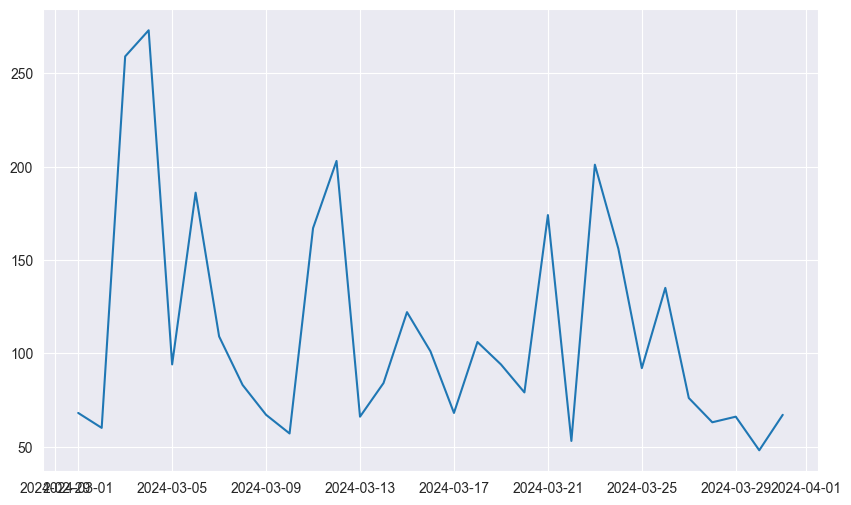

In [37]:
plt.figure(figsize=(10,6))
plt.plot(sales_data["Date"],sales_data["Sales Volume"]);